In [24]:
import pandas as pd
import pandas_datareader.data as web
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datapane as dp
import datetime as dt
import quandl
from wallstreet import Stock, Call

quandl.ApiConfig.api_key = "AS5TRXy47MQSBYqFpTKG"

plotly.offline.init_notebook_mode(connected=True)

import plotly.io as pio
pio.templates.default = "plotly_dark"

start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()
days = (end - start).days

In [38]:
def get_data(code, start, end, trans=''):
    return quandl.get(code, start_date=start, end_date=end, transform=trans)

df = pd.DataFrame()

df['RDSA'] = get_data('EURONEXT/RDSA', start, end, trans='normalize').Open
df['Total'] = get_data('EURONEXT/FP', start, end, trans='normalize').Open
df['bbl'] = get_data('FRED/DCOILBRENTEU', start, end)

s = Stock('XOM')
XOM = s.historical(days_back=days, frequency='d')
XOM = XOM.set_index('Date').Open
df['XOM'] = 100*(XOM/XOM[0])

s = Stock('CVX')
CVX = s.historical(days_back=days, frequency='d')
CVX = CVX.set_index('Date').Open
df['CVX'] = 100*(CVX/CVX[0])

s = Stock('BP')
BP = s.historical(days_back=days, frequency='d')
BP = BP.set_index('Date').Open
df['BP'] = 100*(BP/BP[0])


In [39]:
df.head()

,RDSA,Total,bbl,XOM,CVX,BP
Date,,,,,,
2020-01-02,100.000000,100.000000,67.05,100.000000,100.000000,100.000000
2020-01-03,101.421801,101.103016,69.08,101.566056,100.802915,101.156675
2020-01-06,102.938389,101.781016,70.25,100.113898,100.355931,104.311249
2020-01-07,103.317536,102.246509,68.74,100.370162,98.518334,103.470031
2020-01-08,102.976303,102.712002,67.31,99.814925,98.129298,103.154577


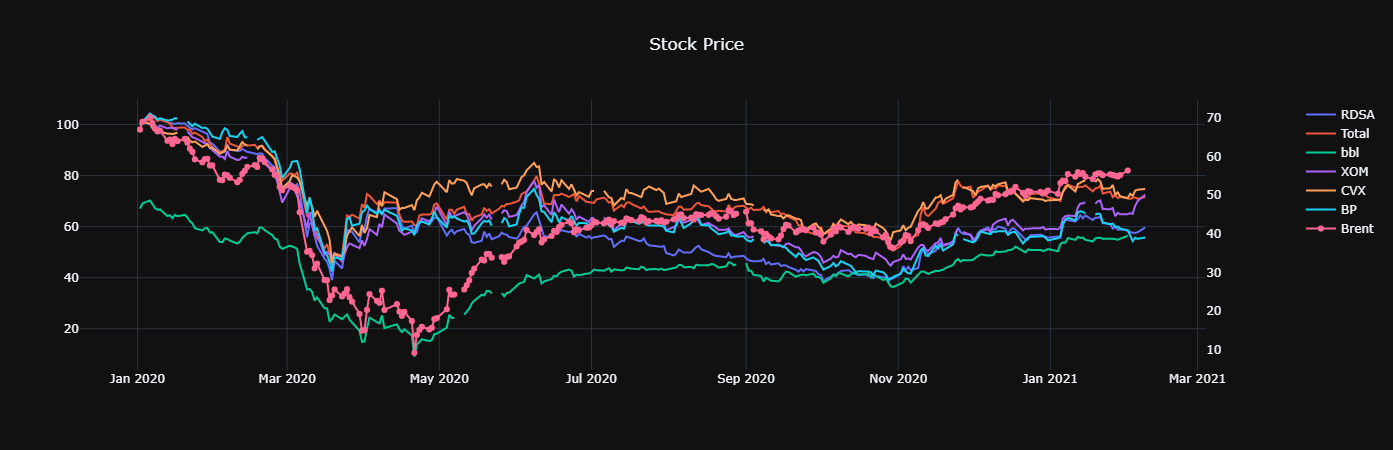

In [48]:
fig0 = make_subplots(specs=[[{"secondary_y": True}]])

for company in df.columns:
    fig0.add_trace(go.Scatter(
        x=df.index, 
        y=df[company], 
        mode='lines', 
        name=company,
    ), secondary_y=False)

fig0.add_trace(go.Scatter(x=df.index, y=df.bbl,
                    mode='lines+markers',
                    name='Brent'),
                    secondary_y=True
             )

fig0.update_layout(
    yaxis2 = {'showgrid': False},
    title={
        'text': "Stock Price",
        'x':0.5,
        'xanchor': 'center'})
fig0.show()

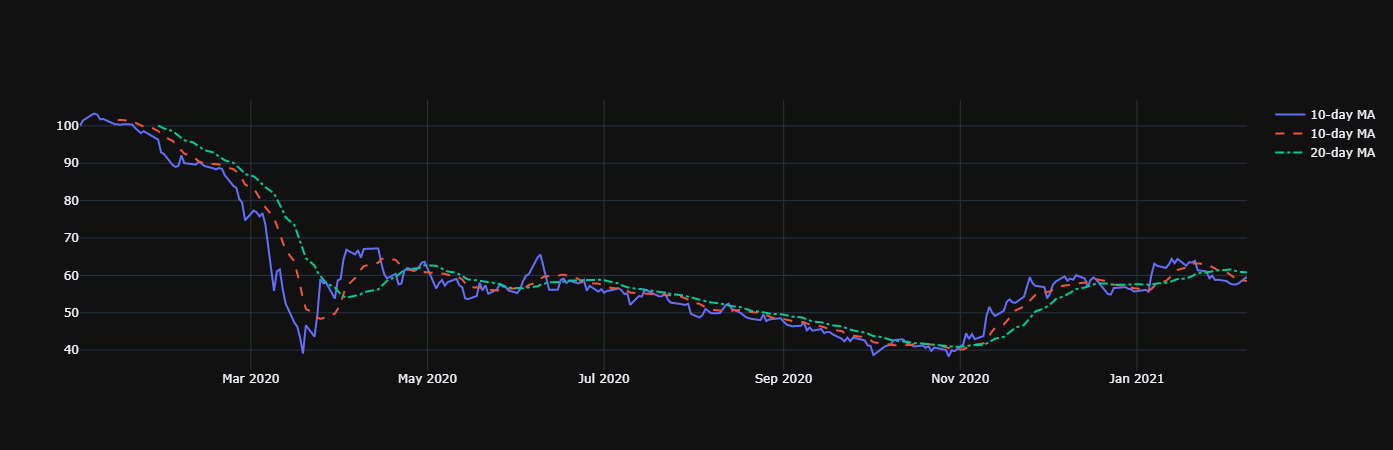

In [57]:
df['RDSA 10-day MA'] = df['RDSA'].rolling(window=10).mean()
df['RDSA 20-day MA'] = df['RDSA'].rolling(window=20).mean()

trace0 = go.Scatter(x=df.index, y=df['RDSA'], name='10-day MA')
trace1 = go.Scatter(x=df.index, y=df['RDSA 10-day MA'], name='10-day MA', line={'dash': 'dash'})
trace2 = go.Scatter(x=df.index, y=df['RDSA 20-day MA'], name='20-day MA', line={'dash': 'dashdot'})
fig1 = go.Figure([trace0, trace1, trace2])
fig1.show()

In [59]:
# Authenticate with your API token
dp.login(token="f8473bc9602d82a2f16797af897ebb21a5adad83")

dp.Report(
    dp.Group(
        dp.Plot(fig0), 
        dp.Plot(fig1), 
        columns=2,
        rows=1
    ),
).publish(name='stock_report', open=True)

Connected successfully to https://datapane.com as gpagliuca
Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/gpagliuca/reports/stock-report/
